In [ ]:
# !unzip /content/drive/MyDrive/combined.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
print(tf.__version__)

# # Install a specific version if needed
!pip install tensorflow==2.15.1

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
train_data_dir = '/kaggle/input/unbalanced/unbalanced_split/train'
test_data_dir = '/kaggle/input/unbalanced/unbalanced_split/test'

# Set the hyperparameters
img_width = 224
img_height = 224
# img_width = 64
# img_height = 64
batch_size = 64
seed = 123

# Define the data generators with preprocessing steps
train_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets using the data generator
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    class_mode='categorical',  # Set class_mode to 'categorical' for 3 classes
    subset='training'
)

validation_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    class_mode='categorical',  # Set class_mode to 'categorical' for 3 classes
    subset='validation'
)

# Load the test dataset using the data generator
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'  # Set class_mode to 'categorical' for 3 classes
)


2024-08-11 13:04:47.308489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 13:04:47.308541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 13:04:47.309914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2352 images belonging to 3 classes.
Found 1007 images belonging to 3 classes.
Found 1442 images belonging to 3 classes.


In [2]:
# import numpy as np
# target_train=[]
# target_val=[]
# def extract_images_from_generator(generator):
#     images = []
#     targets=[]
#     for _ in range(len(generator)):
#         x_batch, y= next(generator)
#         images.append(x_batch)
#         targets.append(y)
#     return np.vstack(images),np.vstack(targets)

# # Reset the generators to start from the beginning
# # train_generator.reset()
# # validation_generator.reset()
# # test_generator.reset()

# # Extract images from the train, validation, and test generators
# x_train_all,target_train = extract_images_from_generator(train_generator)
# x_val_all,target_val = extract_images_from_generator(validation_generator)
# # x_test_all,target_test= extract_images_from_generator(test_generator)

# # Print shapes of the arrays to confirm
# print(f"x_train_all shape: {x_train_all.shape}")
# print(f"x_val_all shape: {x_val_all.shape}")
# # print(f"x_test_all shape: {x_test_all.shape}")

x_train_all shape: (2352, 224, 224, 3)
x_val_all shape: (1007, 224, 224, 3)


In [ ]:
# # Get the number of images for each class in the training set
# num_classes = 3

# # Initialize counts for each class
# class_counts_train = [0] * num_classes
# class_counts_val = [0] * num_classes
# class_counts_test = [0] * num_classes

# # Count the occurrences of each class label in the training set
# for label in train_generator.labels:
#     class_counts_train[label] += 1
#     # target_train.append(label)

# # Count the occurrences of each class label in the validation set
# for label in validation_generator.labels:
#     class_counts_val[label] += 1

# # Count the occurrences of each class label in the test set
# for label in test_generator.labels:
#     class_counts_test[label] += 1
#     # target_test.append(label)

# # Print the counts for each class
# for i in range(num_classes):
#     print("Number of images for class {} in the training set: {}".format(i, class_counts_train[i]))
#     print("Number of images for class {} in the validation set: {}".format(i, class_counts_val[i]))
#     print("Number of images for class {} in the test set: {}".format(i, class_counts_test[i]))


In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# import cv2

# # Set the paths to the train dataset for the classes
# train_path_MCI = "/kaggle/input/unbalanced/unbalanced_split/train/MCI"
# train_path_AD = "/kaggle/input/unbalanced/unbalanced_split/train/AD"
# train_path_CN = "/kaggle/input/unbalanced/unbalanced_split/train/CN"

# # Get a list of all the image filenames in the train dataset directory for each class
# # image_filenames_AD = os.listdir(train_path_AD)
# image_filenames_CN = os.listdir(train_path_CN)
# image_filenames_MCI = os.listdir(train_path_MCI)
# image_filenames_AD = os.listdir(train_path_AD)

# # Load two random images from each class
# random.seed(123)  # for reproducibility
# # random_AD = random.choice(image_filenames_AD)
# random_CN = random.choice(image_filenames_CN)
# random_MCI = random.choice(image_filenames_MCI)
# random_AD = random.choice(image_filenames_AD)

# # img_AD = cv2.imread(os.path.join(train_path_AD, random_AD))
# img_CN = cv2.imread(os.path.join(train_path_CN, random_CN))
# img_MCI = cv2.imread(os.path.join(train_path_MCI, random_MCI))
# img_AD = cv2.imread(os.path.join(train_path_AD, random_AD))

# # Convert images to RGB format
# # rgb_img_AD = cv2.cvtColor(img_AD, cv2.COLOR_BGR2RGB)
# rgb_img_CN = cv2.cvtColor(img_CN, cv2.COLOR_BGR2RGB)
# rgb_img_MCI = cv2.cvtColor(img_MCI, cv2.COLOR_BGR2RGB)
# rgb_img_AD = cv2.cvtColor(img_AD, cv2.COLOR_BGR2RGB)

# # Resize the images to the same size
# rgb_img_AD = cv2.resize(rgb_img_AD, (224, 224))
# rgb_img_CN = cv2.resize(rgb_img_CN, (224, 224))
# rgb_img_MCI = cv2.resize(rgb_img_MCI, (224, 224))

# # Create a figure with three subplots
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# # Display the images on subplots
# ax[0].imshow(rgb_img_AD)
# ax[0].set_title("AD")
# ax[0].axis('off')

# ax[1].imshow(rgb_img_CN)
# ax[1].set_title("CN")
# ax[1].axis('off')

# ax[2].imshow(rgb_img_MCI)
# ax[2].set_title("MCI")
# ax[2].axis('off')

# # ax[2].imshow(rgb_img_AD)
# # ax[2].set_title("AD")
# # ax[2].axis('off')

# # Show the figure
# plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model

# Define the input size expected by DenseNet121
# 224,224
img_width, img_height =224,224

# Load pre-trained DenseNet121 model without the top (classification) layer
model_dir = '/content/drive/MyDrive/RadImageNet_models/RadImageNet-DenseNet121_notop.h5'
# model_dir='/content/RadImageNet-ResNet50_notop.h5'
# model_dir='/content/drive/MyDrive/RadImageNet_models/RadImageNet-IRV2_notop.h5'
densenet_121 = load_model(model_dir)
# print("Number of layers in the base model: ", len(densenet_121.layers))
# for i, layer in enumerate(densenet_121.layers):
#         print(f"Layer number of {layer.name}: {i}")
densenet_121.trainable = True
# 313
fine_tune_at = 141

# # Freeze the layers of DenseNet121 model
for layer in densenet_121.layers[:fine_tune_at]:
    layer.trainable = False
# densenet_121.trainable=False

# Add custom classification layers on top of DenseNet121
# def densenet_121_radimagenet():
#     inputs = Input(shape=(img_width, img_height, 3))
#     x = densenet_121(inputs)
#     x = Flatten()(x)
#     outputs = Dense(3, activation='softmax')(x)  # Adjusted for 3 classes
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# Add dropout layers to the custom classification layers
def densenet_121_radimagenet():
    inputs = Input(shape=(img_width, img_height, 3))
    x = densenet_121(inputs)
    x = Flatten()(x)
    x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
    x = Dense(512, activation='relu')(x)  # Adjusted for 3 classes
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
    x = Dense(128, activation='relu')(x)  # Adjusted for 3 classes
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
    x = Dense(64, activation='relu')(x)  # Adjusted for 3 classes
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
    outputs = Dense(3, activation='softmax')(x)  # Adjusted for 3 classes
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
densenet_121_radimagenet = densenet_121_radimagenet()

# Compile the model
optimizer = Adam(learning_rate=0.001)
densenet_121_radimagenet.compile(optimizer=optimizer,
                                  loss='categorical_crossentropy',  # Adjusted for 3 classes
                                  metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint(filepath='/content/densenet_dropout_0.3.h5',
                             save_weights_only=False,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0.001,
                               patience=5,  # Number of epochs with no improvement
                              #  mode='max',  # Stop when validation accuracy stops increasing
                               verbose=1,
                               restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

# Train the model
history_densenet_121_radimagenet = densenet_121_radimagenet.fit(train_generator,
                                                                 validation_data=validation_generator,
                                                                 steps_per_epoch=len(train_generator),
                                                                 validation_steps=len(validation_generator),
                                                                 callbacks=[checkpoint,early_stopping,reduce_lr],
                                                                 epochs=100)


In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator  # This is the import statement
# from tensorflow.keras.applications import DenseNet121
# from tensorflow.keras.models import Model

# img_width, img_height =224,224
# no_classes = 3
# num_folds = 5

# model_dir = '/content/drive/MyDrive/RadImageNet_models/RadImageNet-DenseNet121_notop.h5'
# densenet_121 = load_model(model_dir)
# densenet_121.trainable = True
# # 313
# fine_tune_at = 141

# for layer in densenet_121.layers[:fine_tune_at]:
#     layer.trainable = False

# # input_train = train_generator.astype('float32')
# # input_test = test_generator.astype('float32')

# acc_per_fold = []
# loss_per_fold = []

# # Merge inputs and targets
# input = np.concatenate((x_train_all, x_val_all), axis=0)
# targets = np.concatenate((target_train, target_val), axis=0)

# kfold = KFold(n_splits=num_folds, shuffle=True)

# data_gen_args = dict(rescale=1./255)
# image_data_gen = ImageDataGenerator(**data_gen_args)

# # K-fold Cross Validation model evaluation
# fold_no = 1
# for train, val in kfold.split(input, targets):
#   def densenet_121_radimagenet():
#     inputs = Input(shape=(img_width, img_height, 3))
#     x = densenet_121(inputs)
#     x = Flatten()(x)
#     x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
#     x = Dense(512, activation='relu')(x)  # Adjusted for 3 classes
#     x = BatchNormalization()(x)
#     x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
#     x = Dense(128, activation='relu')(x)  # Adjusted for 3 classes
#     x = BatchNormalization()(x)
#     x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
#     x = Dense(64, activation='relu')(x)  # Adjusted for 3 classes
#     x = BatchNormalization()(x)
#     x = Dropout(0.2)(x)  # Add dropout with a dropout rate of 0.5 (adjust as needed)
#     outputs = Dense(3, activation='softmax')(x)  # Adjusted for 3 classes
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # Create the model
#   densenet_121_radimagenet = densenet_121_radimagenet()

# # Compile the model
#   optimizer = Adam(learning_rate=0.001)
#   densenet_121_radimagenet.compile(optimizer=optimizer,
#                                     loss='categorical_crossentropy',  # Adjusted for 3 classes
#                                     metrics=['accuracy'])

# # Define a ModelCheckpoint callback to save the best model during training
#   checkpoint = ModelCheckpoint(filepath='/content/densenet_dropout_0.3.h5',
#                               save_weights_only=False,
#                               monitor='val_accuracy',
#                               mode='max',
#                               save_best_only=True)

#   early_stopping = EarlyStopping(monitor='val_accuracy',
#                                 min_delta=0.001,
#                                 patience=5,  # Number of epochs with no improvement
#                                 #  mode='max',  # Stop when validation accuracy stops increasing
#                                 verbose=1,
#                                 restore_best_weights=True)
#   reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

#   print('------------------------------------------------------------------------')
#   print(f'Training for fold {fold_no} ...')

#   train_generator = image_data_gen.flow(input[train], targets[train], batch_size=batch_size)
#   val_generator = image_data_gen.flow(input[val], targets[val], batch_size=batch_size)


#   history_densenet_121_radimagenet = densenet_121_radimagenet.fit(train_generator,
#                                                                   validation_data=val_generator,
#                                                                   steps_per_epoch=len(train_generator),
#                                                                   validation_steps=len(validation_generator),
#                                                                   callbacks=[checkpoint,early_stopping,reduce_lr],
#                                                                   epochs=100)
#   model_121_ = tf.keras.models.load_model('/content/densenet_dropout_0.3.h5')
#   loss, accuracy = model_121_.evaluate(val_generator)
#   print(f'Score for fold {fold_no}: loss: {loss}; accuracy: {accuracy*100}%')
#   acc_per_fold.append(accuracy * 100)
#   loss_per_fold.append(loss)

#   # Increase fold number
#   fold_no = fold_no + 1

# # == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(0, len(acc_per_fold)):
#   print('------------------------------------------------------------------------')
#   print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
# print('------------------------------------------------------------------------')
# print('Average scores for all folds:')
# print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
# print(f'> Loss: {np.mean(loss_per_fold)}')
# print('------------------------------------------------------------------------')





In [3]:
# from sklearn.model_selection import StratifiedKFold
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import DenseNet121
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# import gc

# img_width, img_height = 224, 224
# no_classes = 3
# num_folds = 5
# # batch_size = 32  # Adjust as needed

# model_dir = '/kaggle/input/denseness/keras/default/1/RadImageNet-DenseNet121_notop.h5'
# densenet_121 = load_model(model_dir)
# densenet_121.trainable = True
# fine_tune_at = 141

# for layer in densenet_121.layers[:fine_tune_at]:
#     layer.trainable = False

# acc_per_fold = []
# loss_per_fold = []

# # Merge inputs and targets
# input_data = np.concatenate((x_train_all, x_val_all), axis=0)
# targets = np.concatenate((target_train, target_val), axis=0)
# targets=np.argmax(targets,axis=1)

# skf = StratifiedKFold(n_splits=num_folds,random_state=1, shuffle=True)

# data_gen_args = dict(rescale=1./255)
# image_data_gen = ImageDataGenerator()

# def densenet_121_radimagenet():
#   inputs = Input(shape=(img_width, img_height, 3))
#   x = densenet_121(inputs)
#   x = Flatten()(x)
#   x = Dropout(0.2)(x)
#   x = Dense(512, activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.2)(x)
#   x = Dense(128, activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.2)(x)
#   x = Dense(64, activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.2)(x)
#   outputs = Dense(no_classes, activation='softmax')(x)
#   model = Model(inputs=inputs, outputs=outputs)
#   return model

# # K-fold Cross Validation model evaluation
# fold_no = 1
# for train, val in skf.split(input_data, targets):

#     # if 'training_generator' in locals():
#     #     del training_generator
#     # if 'val_generator' in locals():
#     #     del val_generator
#     # if 'history' in locals():
#     #     del history
#     # del model
#     tf.keras.backend.clear_session()
#     gc.collect()
#     model = densenet_121_radimagenet()

#     # Compile the model
#     optimizer = Adam(learning_rate=0.001)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#     # Define callbacks
#     checkpoint = ModelCheckpoint(filepath=f'/kaggle/working/densenet_lr_{fold_no}.h5',
#                                  save_weights_only=False,
#                                  monitor='val_accuracy',
#                                  mode='max',
#                                  save_best_only=True)

#     early_stopping = EarlyStopping(monitor='val_accuracy',
#                                    min_delta=0.001,
#                                    patience=5,
#                                    verbose=1,
#                                    restore_best_weights=True)

#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

#     print('------------------------------------------------------------------------')
#     print(f'Training for fold {fold_no} ...')

#     y_train=to_categorical(targets[train])
#     y_val=to_categorical(targets[val])

#     training_generator = image_data_gen.flow(input_data[train], y_train, batch_size=batch_size)
#     val_generator = image_data_gen.flow(input_data[val], y_val, batch_size=batch_size)

#     history = model.fit(training_generator,
#                         validation_data=val_generator,
#                         steps_per_epoch=len(training_generator),
#                         validation_steps=len(val_generator),
#                         epochs=100,
#                         callbacks=[checkpoint,reduce_lr, early_stopping])

#     model_best = tf.keras.models.load_model(f'/kaggle/working/densenet_lr_{fold_no}.h5')
#     loss, accuracy = model_best.evaluate(val_generator)
#     print(f'Score for fold {fold_no}: loss: {loss}; accuracy: {accuracy*100}%')
#     acc_per_fold.append(accuracy * 100)
#     loss_per_fold.append(loss)

#     #del model
#     #del training_generator
#     #del val_generator
#     #del history
#     #del y_train
#     #del y_val
#     #tf.keras.backend.clear_session()
#     #gc.collect()
#     # Increase fold number
#     fold_no += 1

# # == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(len(acc_per_fold)):
#     print('------------------------------------------------------------------------')
#     print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
# print('------------------------------------------------------------------------')
# print('Average scores for all folds:')
# print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
# print(f'> Loss: {np.mean(loss_per_fold)}')
# print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100


I0000 00:00:1723381552.642650   12840 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 [==============================] - ETA: 0s - loss: 1.1105 - accuracy: 0.5341

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 90s 840ms/step - loss: 1.1105 - accuracy: 0.5341 - val_loss: 1.5120 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 18s 426ms/step - loss: 0.6324 - accuracy: 0.7350 - val_loss: 0.7125 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 18s 429ms/step - loss: 0.3919 - accuracy: 0.8534 - val_loss: 0.6058 - val_accuracy: 0.7827 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 16s 379ms/step - loss: 0.2134 - accuracy: 0.9256 - val_loss: 0.7700 - val_accuracy: 0.7426 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 18s 430ms/step - loss: 0.1443 - accuracy: 0.9475 - val_loss: 0.4580 - val_accuracy: 0.8527 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 16s 373ms/step - loss: 0.1113 - accuracy: 0.9658 - val_loss: 0.7875 - val_accuracy: 0.7723 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 18s 428ms/step - 

In [ ]:
# import tensorflow
# best_model = tensorflow.keras.models.load_model('/content/irv2_radimagenet_64_6040.h5')

# # Perform validation
# validation_loss, validation_accuracy = best_model.evaluate(validation_generator)
# print(f'Validation Loss: {validation_loss}, Validation Accuracy: {validation_accuracy}')

In [ ]:
# !pip install tensorflow

In [8]:
# Load the modeldensenet_{fold_no}.h5
import tensorflow
model_121_ = tensorflow.keras.models.load_model('/kaggle/working/densenet_lr_1.h5')


# Evaluate the model on the test data
loss, accuracy = model_121_.evaluate(test_generator)

print(f"Validation loss: {round(loss, 2)}")
print(f"Validation accuracy: {round(accuracy, 2)}")

23/23 [==============================] - 6s 171ms/step - loss: 0.1848 - accuracy: 0.9521
Validation loss: 0.18
Validation accuracy: 0.95


In [11]:
acc=[]
loss=[]
for i in range(1,6):
    print('------------------------------------------------------------------------\n')
    print(f"Model {i}")
    model_121_ = tensorflow.keras.models.load_model(f'/kaggle/working/densenet_lr_{i}.h5')


# Evaluate the model on the test data
    l, accuracy = model_121_.evaluate(test_generator)
    acc.append(accuracy)
    loss.append(l)

    print(f"Test loss: {round(l, 2)}")
    print(f"Test accuracy: {round(accuracy, 2)}")
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss[i]} - Accuracy: {acc[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc)} (+- {np.std(acc)})')
print(f'> Loss: {np.mean(loss)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------

Model 1
23/23 [==============================] - 6s 177ms/step - loss: 0.1433 - accuracy: 0.9438
Test loss: 0.14
Test accuracy: 0.94
------------------------------------------------------------------------

Model 2
23/23 [==============================] - 6s 179ms/step - loss: 0.1599 - accuracy: 0.9452
Test loss: 0.16
Test accuracy: 0.95
------------------------------------------------------------------------

Model 3
23/23 [==============================] - 8s 253ms/step - loss: 0.1350 - accuracy: 0.9605
Test loss: 0.14
Test accuracy: 0.96
------------------------------------------------------------------------

Model 4
23/23 [==============================] - 6s 175ms/step - loss: 0.1266 - accuracy: 0.9549
Test loss: 0.13
Test accuracy: 0.95
------------------------------------------------------------------------

Model 5
23/23 [==============================] - 6s 176ms/step - loss: 0.1848 - accuracy: 0.9521
T

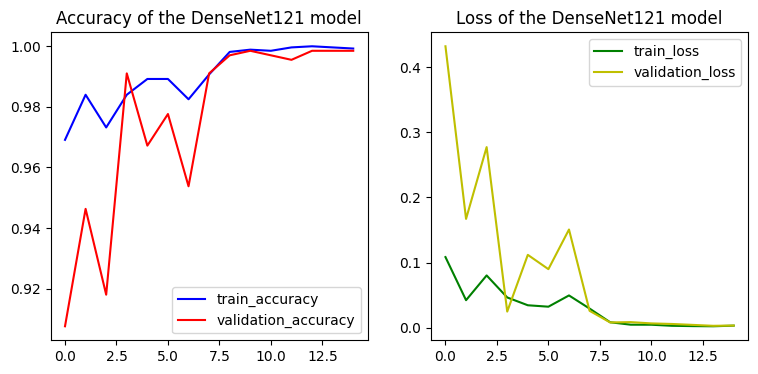

In [15]:
import matplotlib.pyplot as plt

# Create a figure and two subplots, side by side
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))

# Plot the accuracy score of our model in the left subplot
ax[0].plot(history.history['accuracy'], c = 'b', label = 'train_accuracy')
ax[0].plot(history.history['val_accuracy'], c = 'r', label = 'validation_accuracy')
ax[0].set_title('Accuracy of the DenseNet121 model')
ax[0].legend()

# Plot the loss value of our model in the right subplot
ax[1].plot(history.history['loss'], c = 'g', label = 'train_loss')
ax[1].plot(history.history['val_loss'], c = 'y', label = 'validation_loss')
ax[1].set_title('Loss of the DenseNet121 model')
ax[1].legend()

In [26]:
model_121_ = tensorflow.keras.models.load_model('/kaggle/working/densenet_lr_4.h5')

In [27]:
# Generate predictions for the validation dataset
y_pred = model_121_.predict(test_generator)
y_pred = y_pred.round()

# Get the true classes
y_true = test_generator.classes

23/23 [==============================] - 6s 178ms/step


In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np

# Generate predictions for the test dataset
y_pred = model_121_.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_true, y_pred_labels)
print("\nAccuracy score: ",accuracy)


23/23 [==============================] - 4s 175ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       265
           1       0.96      0.99      0.97       736
           2       0.94      0.94      0.94       441

    accuracy                           0.95      1442
   macro avg       0.95      0.94      0.95      1442
weighted avg       0.95      0.95      0.95      1442

Confusion Matrix:
[[238   8  19]
 [  2 726   8]
 [  7  21 413]]

Accuracy score:  0.9549237170596394
